#Ejercicio de clasificación con K-means manual usando la geometría de Mahalanobis:

Inicialmente, se importan las librerías principales:

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Seguido a esto, se llaman los datos ya subidos a la web, para luego ser leidos gracias a la librería pandas y convertirlos a un arreglo.

In [148]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS7dPZu3VcPsEfmQ7vrhVc38TPipvQo0Ol9rElCa9AJyEGwMV18iDB2SPg71GOeB4fFY7krDf0ake9i/pub?output=csv'
datos = pd.read_csv(url)
X = datos.values

##PCA:

Ahora se crea un PCA, para ajustar unos datos como principales pidiendo las tres primeras componentes principales.

In [149]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
X_pca= pca.fit_transform(X)

##Implementación manual de K-means usando la distancia de Mahalanobis:

In [152]:
import random
from scipy.spatial import distance

cov = np.cov(X.T)
cov_inver = np.linalg.inv(cov)


def distancia_Mahalanobis(x, c):
  return distance.mahalanobis(x, c, cov_inver)

k = 4
dimension = X.shape[0]
centroids_Mahalanobis = X[random.sample(range(dimension), k)]
clusters_Mahalanobis = np.zeros(dimension)
distancias = np.zeros((dimension, k))

tol = 1e-6
error = 100


while error > tol:
    for i in range(dimension):
        for j in range(k):
            distancias[i, j] = distancia_Mahalanobis(X[i], centroids_Mahalanobis[j])
        clusters_Mahalanobis[i] = np.argmin(distancias[i])

    centroids_Mahalanobis_prev = np.copy(centroids_Mahalanobis)
    for l in range(k):
        puntos_cluster = X[clusters_Mahalanobis == l]

        if len(puntos_cluster) > 0:
            centroids_Mahalanobis[l] = np.mean(puntos_cluster, axis=0)
        else:
            print(f"Cluster {l} vacío, reasignando centroide aleatoriamente")
            centroids_Mahalanobis[l] = X[np.random.choice(dimension)]

    error = np.mean([distancia_Mahalanobis(centroids_Mahalanobis[l], centroids_Mahalanobis_prev[l]) for l in range(k)])
    print(error)

4.852932139455282
0.3822275440065699
0.2683459698719201
0.1992628256093409
0.16417916351427816
0.15492035794236758
0.1563649188121124
0.17934614879893038
0.16886632848401933
0.15218336916670963
0.12936725003760727
0.11596217337728496
0.0908086720908194
0.08312375082984808
0.08259127872842845
0.08058319791707311
0.06769909783983467
0.06408714304014534
0.06290295357971748
0.0516752634401458
0.027549493974027287
0.015304021126217789
0.008641588949588714
0.005454433175782103
0.006133013452111849
0.003974233562645471
0.0029080412755411508
0.0016501069365181392
0.00072936984681009
0.000976579299968239
0.0005889280246170116
0.0006341303463331589
0.0


Se ajustan los centroides para la gráfica, los cuales pasan de 45 dimensiones a 3, gracias al PCA.

In [139]:
centroids_Mahalanobis = np.array(centroids_Mahalanobis)
centroids_Mahalanobis = pca.transform(centroids_Mahalanobis)
centroids_Mahalanobis

array([[207.53624617, -14.95768587,  30.71744999],
       [-53.41163337, -10.62760229,  15.0205371 ],
       [-18.48580736, -14.04418313, -14.13671469],
       [  2.7533442 ,  68.68065221, -11.4083299 ]])

##Gráficas:

Se organizan los *clusters* para su visualización como tipo entero (int):

In [140]:
clusters_Mahalanobis = clusters_Mahalanobis.astype(int)

###Gráfica 2d:

Se declara la función para hacer un gráfico de dispersión en 2d, usando las dos primeras componentes:

In [145]:
def graficar_clusters_Maha_PCA2D(clusters, metodo, centroids):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                    hue=clusters_Mahalanobis, palette = 'PRGn',
                    alpha=0.6, s = 100)
    plt.scatter(centroids_Mahalanobis[:,0], centroids_Mahalanobis[:,1], c= 'black', s = 100, label = 'Centroides')
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.grid(linestyle = '-', alpha  = 0.5)
    plt.legend(title='Cluster')
    plt.show()

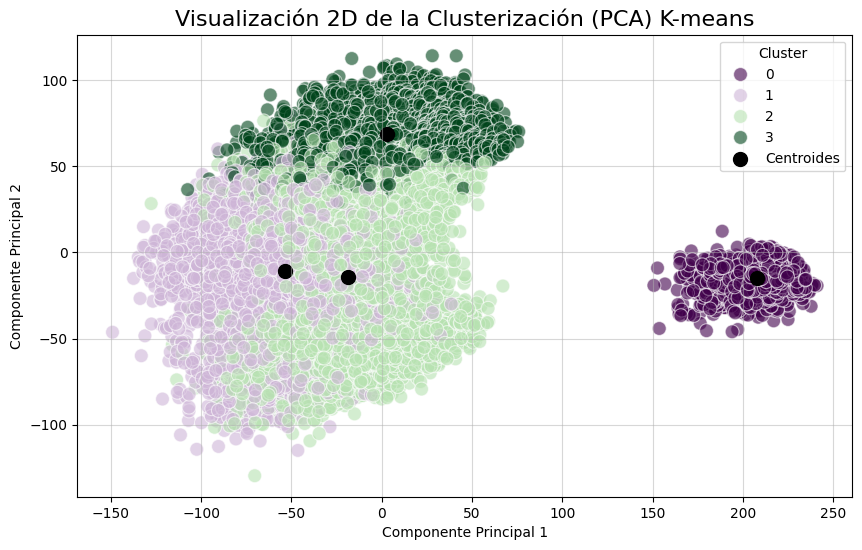

In [146]:
kmeans_Maha_2D = graficar_clusters_Maha_PCA2D(clusters_Mahalanobis, 'K-means', centroids_Mahalanobis)

###Gráfica 3D:

Realizando la función para graficar en 3D, pero inicialmente se importa el método Axes 3D de mpl_toolkits.

In [143]:
from mpl_toolkits.mplot3d import Axes3D

def graficar_clusters_PCA3D_Maha(clusters, metodo):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],
                       c=clusters_Mahalanobis, cmap = 'PRGn',
                       alpha=0.6)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    legend1= ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster")
    ax.add_artist(legend1)
    plt.show()

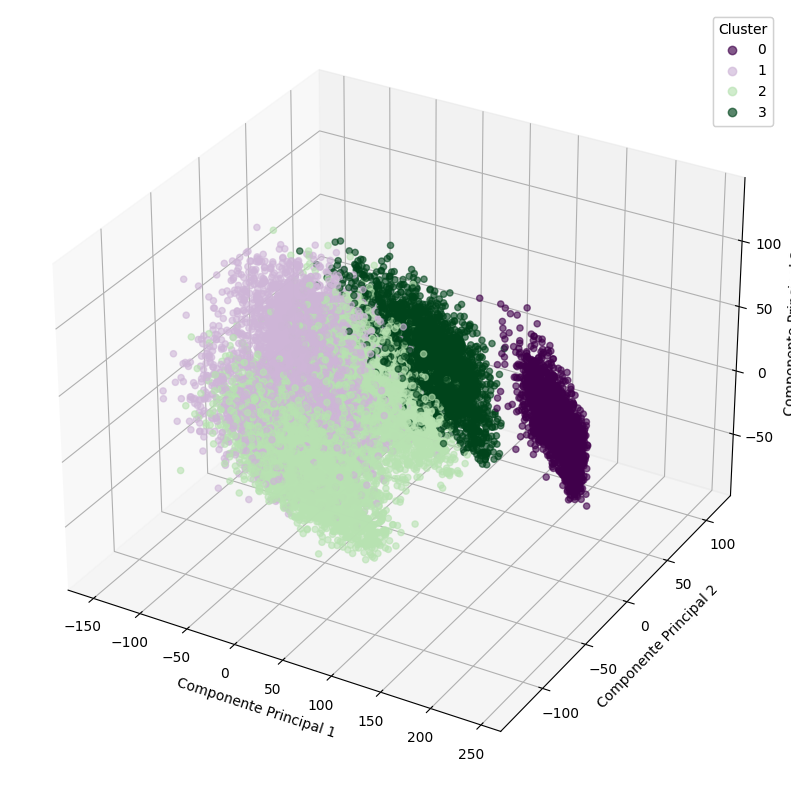

In [147]:
graficar_clusters_PCA3D_Maha(clusters_Mahalanobis, 'K-means')